<a href="https://colab.research.google.com/github/SaidTheCoder/c113/blob/main/c112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving C112.csv to C112.csv


In [3]:
import csv
import pandas as pd
import statistics
import plotly.express as px

df=pd.read_csv("C112.csv")
fig=px.scatter(df,y="quant_saved",color="rem_any")
fig.show()

In [4]:
import csv
with open("C112.csv",newline="") as f:
  reader=csv.reader(f)
  savings_data=list(reader)

savings_data.pop(0)
total_entries=len(savings_data)
total_people_given_reminder=0
for data in savings_data:
  if int(data[3])==1:
    total_people_given_reminder+=1
import plotly.graph_objects as go
fig=go.Figure(go.Bar(x=["reminded","not reminded"],y=[total_people_given_reminder,(total_entries-total_people_given_reminder)]))
fig.show()

In [5]:
all_savings=[]
for data in savings_data:
  all_savings.append(float(data[0]))
print(f"mean of savings-{statistics.mean(all_savings)}")
print(f"median of savings-{statistics.median(all_savings)}")
print(f"mode of savings-{statistics.mode(all_savings)}")

mean of savings-85.32780331328739
median of savings-39.2724
mode of savings-0.0


In [6]:
reminded_savings=[]
not_reminded_savings=[]
for data in savings_data:
  if int(data[3])==1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))
print("result of people who were reminded to save")
print(f"mean of savings-{statistics.mean(reminded_savings)}")
print(f"median of savings-{statistics.median(reminded_savings)}")
print(f"mode of savings-{statistics.mode(reminded_savings)}")

print("result of people who were not reminded to save")
print(f"mean of savings-{statistics.mean(not_reminded_savings)}")
print(f"median of savings-{statistics.median(not_reminded_savings)}")
print(f"mode of savings-{statistics.mode(not_reminded_savings)}")

result of people who were reminded to save
mean of savings-82.56940908263547
median of savings-39.2724
mode of savings-0.0
result of people who were not reminded to save
mean of savings-89.67095185226523
median of savings-36.0475
mode of savings-0.0


In [7]:
print(f"standard deviation of all of the data-{statistics.stdev(all_savings)}")
print(f"standard deviation of people who were reminded-{statistics.stdev(reminded_savings)}")
print(f"standard deviation of the people who were not reminded-{statistics.stdev(not_reminded_savings)}")



standard deviation of all of the data-196.75453011909315
standard deviation of people who were reminded-173.24866414440817
standard deviation of the people who were not reminded-228.875050299707


In [8]:
import numpy as np
age=[]
savings=[]
for data in savings_data:
  if float(data[5])!=0:
    age.append(float(data[5]))
    savings.append(float(data[0]))
correlation=np.corrcoef(age,savings)
print(f"correlation between the age of the person and their savings is-{correlation[0,1]}")

correlation between the age of the person and their savings is-0.036634479759854614


In [9]:
import plotly.figure_factory as ff
fig=ff.create_distplot([df["quant_saved"].tolist()],["savings"],show_hist=False)
fig.show()

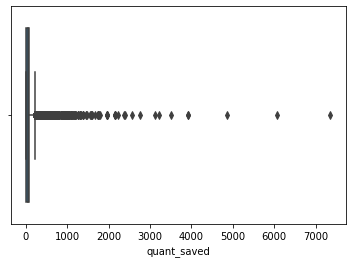

In [12]:
import seaborn as sns
sns.boxplot(data=df,x=df["quant_saved"])

In [14]:
q1=df["quant_saved"].quantile(0.25)
q3=df["quant_saved"].quantile(0.75)
iqr=q3-q1
print(f"q1-{q1}")
print(f"q3-{q3}")
print("iqr-",iqr)

q1-2.2840000000000003
q3-86.514
iqr- 84.22999999999999


In [15]:
lower_value=q1-1.5*iqr
upper_value=q3+1.5*iqr
print(f"lower value-{lower_value}")
print(f"upper value-{upper_value}")


lower value--124.06099999999998
upper value-212.85899999999998


In [16]:
new_df=df[df["quant_saved"]<upper_value]
all_savings=new_df["quant_saved"].tolist()
print(f"mean of savings-{statistics.mean(all_savings)}")
print(f"median of savings-{statistics.median(all_savings)}")
print(f"mode of savings-{statistics.mode(all_savings)}")
print(f"standard deviation of savings-{statistics.stdev(all_savings)}")
fig=ff.create_distplot([new_df["quant_saved"].tolist()],["savings"],show_hist=False)
fig.show()

mean of savings-46.200519389818794
median of savings-36.0475
mode of savings-0.0
standard deviation of savings-50.866871917288634


In [18]:
import random
sampling_mean_list=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))
mean_sampling=statistics.mean(sampling_mean_list)
fig=ff.create_distplot([sampling_mean_list],["savings"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="NAME."))
fig.show()


In [19]:
print(f"standard deviation of sampling data-{statistics.stdev(sampling_mean_list)}")


standard deviation of sampling data-5.207799822580759


In [20]:
print(f"mean of savings-{statistics.mean(all_savings)}")
print(f"mean of sampling distribution-{mean_sampling}")

mean of savings-46.200519389818794
mean of sampling distribution-45.97412743297997


In [21]:
temp_df=new_df[new_df.age!=0]
age=temp_df["age"].tolist()
savings=temp_df["quant_saved"].tolist()
correlation=np.corrcoef(age,savings)
print(f"correlation between the age of the person and their savings is-{correlation[0,1]}")


correlation between the age of the person and their savings is-0.0856154412034209


In [22]:
reminded_df=new_df.loc[new_df["rem_any"]==1]
not_reminded_df=new_df.loc[new_df["rem_any"]==0]
print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [23]:
fig=ff.create_distplot([not_reminded_df["quant_saved"].tolist()],["savings"],show_hist=False)
fig.show()

In [24]:
import random
not_reminded_savings=not_reminded_df["quant_saved"].tolist()
sampling_mean_list_not_reminded=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))
mean_sampling_not_reminded=statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded=statistics.stdev(sampling_mean_list_not_reminded)
fig=ff.create_distplot([sampling_mean_list_not_reminded],["savings"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="NAME."))
fig.show()


In [25]:
first_sd_start=mean_sampling_not_reminded-stdev_sampling_not_reminded
first_sd_end=mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"first standard deviation(start)-{first_sd_start} and first(end)-{first_sd_end}")

second_sd_start=mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_sd_end=mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"second standard deviation(start)-{second_sd_start} and second(end)-{second_sd_end}")

third_sd_start=mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_sd_end=mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"third standard deviation(start)-{third_sd_start} and third(end)-{third_sd_end}")


first standard deviation(start)-38.79369270723173 and first(end)-48.628821226113175
second standard deviation(start)-33.876128447791 and second(end)-53.546385485553905
third standard deviation(start)-28.958564188350273 and third(end)-58.46394974499463


In [26]:
import random
reminded_savings=reminded_df["quant_saved"].tolist()
sampling_mean_list_reminded=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))
mean_sampling_reminded=statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded=statistics.stdev(sampling_mean_list_reminded)
fig=ff.create_distplot([sampling_mean_list_reminded],["savings"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode="lines",name="NAME."))
fig.show()


In [27]:
z_score=(mean_sampling_reminded-mean_sampling_not_reminded)/stdev_sampling_not_reminded
print("z score is",z_score)

z score is 0.8088907908639271
